## Data Import

In [115]:
import pandas as pd

kpi_data = pd.read_excel('TFCU_FINAL_DATA.xlsx', index_col=None, 
                             sheet_name='KPI_DATA')
kpi_data.head()

,Emp_Id,Date,Week,Member_Retention,Employee_Retention,Member_Satisfaction_NPS,Fraud_Rate,Employee_Satisfaction,Number_of_Employee Relations_Issues,No_of_Member_Complaints,...,Decline_Rate,Financial_Impact_Due_to_Attacks,Attempted_vs_Fraudulent_Transactions,Final_Approval_Rate,Fraudulent_Vs_Declined_Transactions,System_Uptime,Severity_of_attacks,Mean_Time_Between_Failures,Cost_per_Incident,Number_of_Cybersecurity_Incidents_Reported
0,TCFU0-0001,02-01-2023,WK 01,95,69,62,0.585481,5,1,9,...,4,17659,9,82,82,91,6,93,6160,3
1,TCFU0-0001,09-01-2023,WK 02,72,51,50,0.254247,9,2,2,...,2,11557,6,77,77,96,7,98,8479,2
2,TCFU0-0001,16-01-2023,WK 03,74,86,48,0.378753,8,4,16,...,14,7532,7,71,71,96,5,68,8612,4
3,TCFU0-0001,23-01-2023,WK 04,93,78,71,0.203595,4,1,2,...,12,9011,11,78,78,91,5,81,6388,0
4,TCFU0-0001,30-01-2023,WK 05,63,87,53,0.819296,8,1,5,...,14,6737,11,84,84,98,8,44,5315,4


In [116]:
emp_man = pd.read_excel('TFCU_FINAL_DATA.xlsx', index_col=None, 
                             sheet_name='MASTER_EMPLOYEE_DATA')
emp_man['Full_Name'] = emp_man[['Emp_First_Name', 'Emp_Last_Name' ]].apply(lambda row: 
                                                row['Emp_First_Name']+ ' '+row['Emp_Last_Name'], axis=1)
emp_man.head()

,Emp_Id,Emp_First_Name,Emp_Last_Name,Emp_Mobile,Emp_Email_Id,Emp_Designation,Emp_Branch,Emp_Reporting_Manager_Id,Full_Name
0,TCFU0-0001,Apple,William,631-385 8791,apple.william@tcfu.com,FSR,Bay Shore,TCFU1-0503,Apple William
1,TCFU0-0002,Bri,James,631-385 1161,bri.james@tcfu.com,FSR,Patchogue,TCFU1-0521,Bri James
2,TCFU0-0003,Alaska,Robert,631-385 1994,alaska.robert@tcfu.com,FSR,Amityville,TCFU1-0501,Alaska Robert
3,TCFU0-0004,Ariel,Joseph,631-385 8476,ariel.joseph@tcfu.com,FSR,Amityville,TCFU1-0501,Ariel Joseph
4,TCFU0-0005,Bridgette,George,631-385 8743,bridgette.george@tcfu.com,FSR,Riverhead,TCFU1-0523,Bridgette George


## Data Processing

In [117]:
kpi_man_df = pd.merge(kpi_data, emp_man[['Emp_Id', 'Emp_Branch', 
                                         'Emp_Reporting_Manager_Id']], on='Emp_Id').rename(
    columns={'Emp_Reporting_Manager_Id': 'Reporting_Manager_1'})

In [118]:
kpi_man_vp_df = pd.merge(kpi_man_df, emp_man[['Emp_Id', 'Emp_Reporting_Manager_Id']], 
         left_on='Reporting_Manager_1', right_on='Emp_Id', suffixes=('_kpi', '_emp_man')).rename(
    columns = {
    "Emp_Reporting_Manager_Id": "Reporting_manager_VP"
         })

In [119]:
kpi_man_vp_df.head()

,Emp_Id_kpi,Date,Week,Member_Retention,Employee_Retention,Member_Satisfaction_NPS,Fraud_Rate,Employee_Satisfaction,Number_of_Employee Relations_Issues,No_of_Member_Complaints,...,Fraudulent_Vs_Declined_Transactions,System_Uptime,Severity_of_attacks,Mean_Time_Between_Failures,Cost_per_Incident,Number_of_Cybersecurity_Incidents_Reported,Emp_Branch,Reporting_Manager_1,Emp_Id_emp_man,Reporting_manager_VP
0,TCFU0-0001,02-01-2023,WK 01,95,69,62,0.585481,5,1,9,...,82,91,6,93,6160,3,Bay Shore,TCFU1-0503,TCFU1-0503,TCFU2-0603
1,TCFU0-0001,09-01-2023,WK 02,72,51,50,0.254247,9,2,2,...,77,96,7,98,8479,2,Bay Shore,TCFU1-0503,TCFU1-0503,TCFU2-0603
2,TCFU0-0001,16-01-2023,WK 03,74,86,48,0.378753,8,4,16,...,71,96,5,68,8612,4,Bay Shore,TCFU1-0503,TCFU1-0503,TCFU2-0603
3,TCFU0-0001,23-01-2023,WK 04,93,78,71,0.203595,4,1,2,...,78,91,5,81,6388,0,Bay Shore,TCFU1-0503,TCFU1-0503,TCFU2-0603
4,TCFU0-0001,30-01-2023,WK 05,63,87,53,0.819296,8,1,5,...,84,98,8,44,5315,4,Bay Shore,TCFU1-0503,TCFU1-0503,TCFU2-0603


## Correlation Relationship

In [120]:
overall_fin_impact_wk = kpi_man_vp_df[['Week', 'Financial_Impact_Due_to_Attacks']].groupby('Week').mean().reset_index()
overall_fin_impact_wk.head()

,Week,Financial_Impact_Due_to_Attacks
0,WK 01,14709.1000
1,WK 02,15483.0525
2,WK 03,14896.3150
3,WK 04,14942.6750
4,WK 05,14797.1975


In [121]:
vp_fin_impact_wk = kpi_man_vp_df[['Reporting_manager_VP','Week',
                                  'Financial_Impact_Due_to_Attacks']].groupby(
                                    by=['Week','Reporting_manager_VP' ]).mean().reset_index()

In [122]:
vp_fin_impact_wk.head()

,Week,Reporting_manager_VP,Financial_Impact_Due_to_Attacks
0,WK 01,TCFU2-0601,13874.864583
1,WK 01,TCFU2-0602,16034.981818
2,WK 01,TCFU2-0603,14951.710000
3,WK 01,TCFU2-0604,13751.425532
4,WK 02,TCFU2-0601,15330.302083


In [123]:
vp_name_fin_impact_wk = pd.merge(vp_fin_impact_wk, emp_man[['Emp_Id', 'Full_Name']], 
                                 left_on = 'Reporting_manager_VP',
                                right_on = 'Emp_Id')
vp_name_fin_impact_wk.head()

,Week,Reporting_manager_VP,Financial_Impact_Due_to_Attacks,Emp_Id,Full_Name
0,WK 01,TCFU2-0601,13874.864583,TCFU2-0601,Rebecca Million
1,WK 02,TCFU2-0601,15330.302083,TCFU2-0601,Rebecca Million
2,WK 03,TCFU2-0601,15319.062500,TCFU2-0601,Rebecca Million
3,WK 04,TCFU2-0601,14719.479167,TCFU2-0601,Rebecca Million
4,WK 05,TCFU2-0601,14422.781250,TCFU2-0601,Rebecca Million


In [124]:
vp_name_fin_impact_wk['Full_Name'].unique()

array(['Rebecca Million', 'Alex Junior', 'Rosa Elise', 'Mathew Joseph'],
      dtype=object)

In [125]:
all_correlation = []
for vp in vp_name_fin_impact_wk['Full_Name'].unique():
    vp_fin_impact_kpi = vp_name_fin_impact_wk[
                vp_name_fin_impact_wk['Full_Name']==vp
                    ].reset_index()['Financial_Impact_Due_to_Attacks']
    corr = overall_fin_impact_wk['Financial_Impact_Due_to_Attacks'].corr(vp_fin_impact_kpi, method='pearson')
    all_correlation.append((vp, round(corr,2)))
all_correlation

[('Rebecca Million', 0.49),
 ('Alex Junior', 0.4),
 ('Rosa Elise', 0.63),
 ('Mathew Joseph', 0.44)]

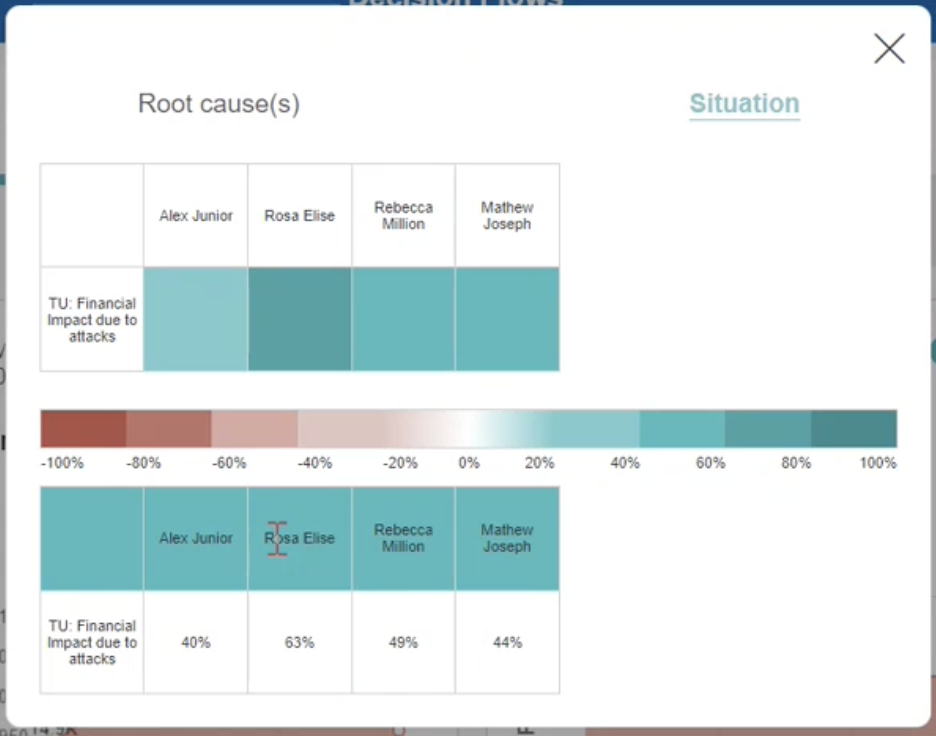

## Contributions

In [126]:
vp_location_df = kpi_man_vp_df[['Reporting_manager_VP', 
               'Emp_Branch','Employee_Satisfaction']].groupby(by=['Reporting_manager_VP', 
                                                                  'Emp_Branch']).mean().reset_index()

In [127]:
vp_location_df.head()

,Reporting_manager_VP,Emp_Branch,Employee_Satisfaction
0,TCFU2-0601,Amityville,5.487179
1,TCFU2-0601,Center Moriches,5.534965
2,TCFU2-0601,East Northport,5.620513
3,TCFU2-0601,Huntington,5.354895
4,TCFU2-0601,Nesconset,5.573427


In [128]:
vp_name_location = pd.merge(vp_location_df, emp_man[['Emp_Id', 'Full_Name']], left_on='Reporting_manager_VP', 
         right_on = 'Emp_Id')[['Reporting_manager_VP','Full_Name','Emp_Branch','Employee_Satisfaction']]


In [129]:
target = 10
total_no_of_contributors = len(vp_name_location)
vp_name_location['overall_contribution'] = vp_name_location['Employee_Satisfaction'].apply(lambda x: x/(target*total_no_of_contributors))
vp_name_location['Deviation from Goal'] = vp_name_location['Employee_Satisfaction'].apply(lambda x: target-x)

In [130]:
vp_name_location.head()

,Reporting_manager_VP,Full_Name,Emp_Branch,Employee_Satisfaction,overall_contribution,Deviation from Goal
0,TCFU2-0601,Rebecca Million,Amityville,5.487179,0.017147,4.512821
1,TCFU2-0601,Rebecca Million,Center Moriches,5.534965,0.017297,4.465035
2,TCFU2-0601,Rebecca Million,East Northport,5.620513,0.017564,4.379487
3,TCFU2-0601,Rebecca Million,Huntington,5.354895,0.016734,4.645105
4,TCFU2-0601,Rebecca Million,Nesconset,5.573427,0.017417,4.426573


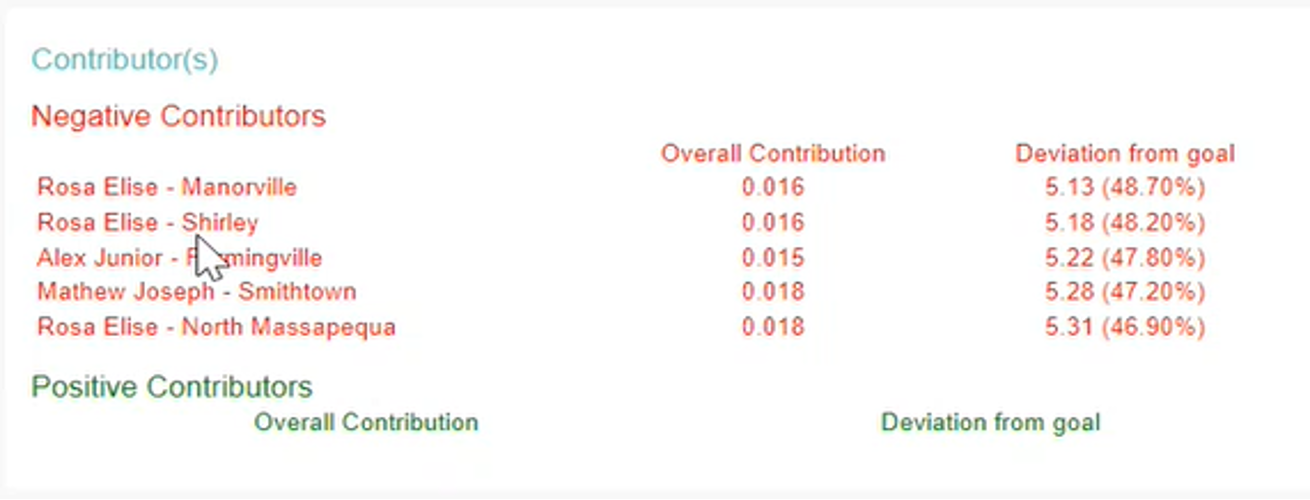

## What IF? Basic Percentage change

In [131]:
vp_name_sat = vp_name_location[['Full_Name', 
                  'Employee_Satisfaction']].groupby(by=['Full_Name']).mean().reset_index()

In [132]:
vp_name.head()

,Full_Name,Employee_Satisfaction
0,Alex Junior,5.508994
1,Mathew Joseph,5.543748
2,Rebecca Million,5.512293
3,Rosa Elise,5.468107


In [133]:
percentage_change = {"Alex Junior": 35,
                    "Rosa Elise": 70,
                    "Rebecca Million": 36,
                    "Mathew Joseph": 0 }

def increase_value(row):
    name, value = row
    percent_increase = percentage_change[name]
    new_value = value * (1+ percent_increase/100)
    return new_value

In [134]:
print(f"Current Value:{round(vp_name['Employee_Satisfaction'].mean(),2)}")
print(f"Simulated Value:{round(vp_name.apply(increase_value, axis = 1).mean(),2)}")

Current Value:5.51
Simulated Value:7.44


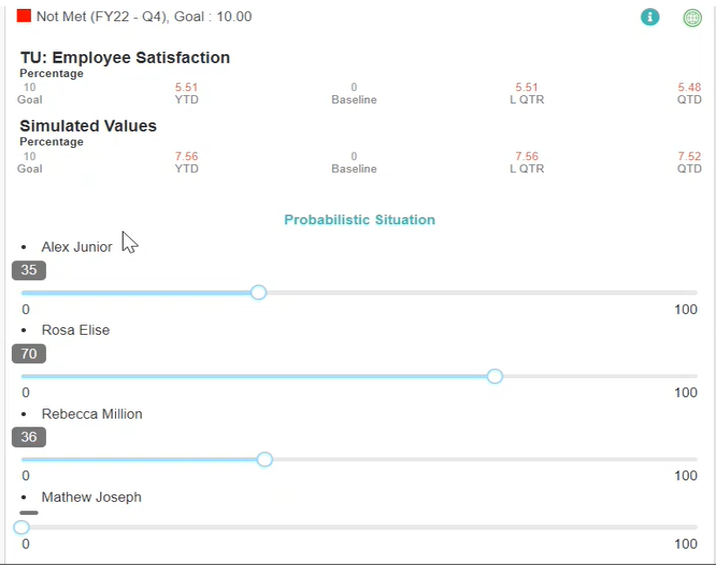

## What IF? Linear Regression

In [135]:
import statsmodels.api as sm

In [136]:
overall_emp_satisfaction_wk = kpi_man_vp_df[['Week', 'Employee_Satisfaction']].groupby('Week').mean().reset_index()
overall_emp_satisfaction_wk.head()

,Week,Employee_Satisfaction
0,WK 01,5.3525
1,WK 02,5.6400
2,WK 03,5.6150
3,WK 04,5.6700
4,WK 05,5.6950


In [137]:
vp_emp_sat_name_value = vp_emp_sat_wk[['Full_Name', 'Employee_Satisfaction']]

In [138]:
vp_emp_sat_name_value.head()

,Full_Name,Employee_Satisfaction
0,Rebecca Million,5.364583
1,Rebecca Million,5.541667
2,Rebecca Million,5.114583
3,Rebecca Million,5.697917
4,Rebecca Million,5.718750


In [139]:
vp_emp_sat_dict = {}
for vp in vp_emp_sat_name_value['Full_Name'].unique():
    emp_sat_val = vp_emp_sat_name_value[vp_emp_sat_name_value["Full_Name"]==vp]['Employee_Satisfaction'].reset_index()['Employee_Satisfaction'].values
    vp_emp_sat_dict[vp] = emp_sat_val

In [140]:
all_vp_emp_sat = pd.DataFrame.from_dict(vp_emp_sat_dict)

In [142]:
all_vp_emp_sat['overall'] = overall_emp_satisfaction_wk['Employee_Satisfaction'].values

In [145]:
all_vp_emp_sat = round(all_vp_emp_sat.head(),2)

In [146]:
all_vp_emp_sat.head()

,Rebecca Million,Alex Junior,Rosa Elise,Mathew Joseph,overall
0,5.36,5.71,5.37,4.90,5.35
1,5.54,5.76,5.40,5.85,5.64
2,5.11,5.95,5.53,5.82,5.62
3,5.70,5.29,5.70,6.05,5.67
4,5.72,5.65,5.49,5.94,5.70


In [154]:
x = all_vp_emp_sat[['Rebecca Million','Alex Junior', 'Rosa Elise', 'Mathew Joseph']]
y = all_vp_emp_sat['overall']
result = sm.OLS(y, x).fit()

In [155]:
result.summary()

/Users/aswin/miniconda3/envs/mlenv/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                overall   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.294e+06
Date:                Wed, 14 Feb 2024   Prob (F-statistic):                    0.000413
Time:                        18:55:17   Log-Likelihood:                          25.278
No. Observations:                   5   AIC:                                     -42.56
Df Residuals:                       1   BIC:                                     -44.12
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Rebecca Million     0.2341      0.007     32.636      0.020       0.143       0.325
Alex Junior         0.2791      0.005     52.813      0.012       0.212       0.346
Rosa Elise          0.2460      0.011     22.111      0.029       0.105       0.387
Mathew Joseph       0.2409      0.005     51.951      0.012       0.182       0.300
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.003
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.122
Skew:                           0.070   Prob(JB):                        0.941
Kurtosis:                       2.247   Cond. No.                         94.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
coeff_df = result.params.reset_index()
coeff_df.columns = ["vp", "coeff"]

In [165]:
coeff_df.head()

,vp,coeff
0,Rebecca Million,0.234110
1,Alex Junior,0.279118
2,Rosa Elise,0.246037
3,Mathew Joseph,0.240862


In [166]:
vp_name.head()

,Full_Name,Employee_Satisfaction
0,Alex Junior,5.508994
1,Mathew Joseph,5.543748
2,Rebecca Million,5.512293
3,Rosa Elise,5.468107


In [ ]:
percentage_change = {"Alex Junior": 35,
                    "Rosa Elise": 70,
                    "Rebecca Million": 36,
                    "Mathew Joseph": 0 }

def increase_value(row):
    name, value = row
    percent_increase = percentage_change[name]
    new_value = value * (1+ percent_increase/100)
    return new_value